# Unpivot (Melt) Examples

This notebook demonstrates the `/unpivot` verb for converting wide-format data to long-format.

**Make sure to select the 'PYRSM DSL' kernel** (not Python).

## Create Sample Wide-Format Data

First, let's create some sample data in wide format - quarterly sales by region.

In [1]:
import polars as pl
import pyrsm as rsm

# Create wide-format sales data
sales_wide = pl.DataFrame({
    "region": ["North", "South", "East", "West"],
    "Q1": [100, 200, 150, 175],
    "Q2": [120, 220, 160, 180],
    "Q3": [140, 240, 170, 190],
    "Q4": [160, 260, 180, 200],
})
print("Wide format:")
print(sales_wide)

Wide format:
shape: (4, 5)
┌────────┬─────┬─────┬─────┬─────┐
│ region ┆ Q1  ┆ Q2  ┆ Q3  ┆ Q4  │
│ ---    ┆ --- ┆ --- ┆ --- ┆ --- │
│ str    ┆ i64 ┆ i64 ┆ i64 ┆ i64 │
╞════════╪═════╪═════╪═════╪═════╡
│ North  ┆ 100 ┆ 120 ┆ 140 ┆ 160 │
│ South  ┆ 200 ┆ 220 ┆ 240 ┆ 260 │
│ East   ┆ 150 ┆ 160 ┆ 170 ┆ 180 │
│ West   ┆ 175 ┆ 180 ┆ 190 ┆ 200 │
└────────┴─────┴─────┴─────┴─────┘


## Basic Unpivot

Unpivot specific columns (Q1-Q4) while keeping `region` as an ID column.

In [2]:
rsm.eda.unpivot(sales_wide, on=['Q1', 'Q2', 'Q3', 'Q4'], id_vars='region')

region,variable,value
str,str,i64
"""North""","""Q1""",100
"""South""","""Q1""",200
"""East""","""Q1""",150
"""West""","""Q1""",175
"""North""","""Q2""",120
…,…,…
"""West""","""Q3""",190
"""North""","""Q4""",160
"""South""","""Q4""",260


## Custom Column Names

Use `variable_name` and `value_name` to give meaningful names to the output columns.

In [3]:
sales_long = rsm.eda.unpivot(sales_wide, on=['Q1', 'Q2', 'Q3', 'Q4'], id_vars='region', variable_name="quarter", value_name="sales")
sales_long

region,quarter,sales
str,str,i64
"""North""","""Q1""",100
"""South""","""Q1""",200
"""East""","""Q1""",150
"""West""","""Q1""",175
"""North""","""Q2""",120
…,…,…
"""West""","""Q3""",190
"""North""","""Q4""",160
"""South""","""Q4""",260


## Pivot and Unpivot Roundtrip

Pivot and unpivot are inverse operations. Let's demonstrate the roundtrip.

In [4]:
rsm.eda.pivot(sales_long, rows='region', cols='quarter', values=['sales'], agg='sum')

region,Q2,Q1,Q3,Q4
str,f64,f64,f64,f64
"""South""",220.0,200.0,240.0,260.0
"""West""",180.0,175.0,190.0,200.0
"""North""",120.0,100.0,140.0,160.0
"""East""",160.0,150.0,170.0,180.0


## Real-World Example: Diamonds Dataset

Let's create a pivot table from the diamonds dataset and then unpivot it.

In [5]:
diamonds = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/data/diamonds.parquet")

In [6]:
price_pivot = rsm.eda.pivot(diamonds, rows="cut", cols="color", values="price", agg="mean")
price_pivot

cut,D,E,H,F,J,I,G
enum,f64,f64,f64,f64,f64,f64,f64
"""Premium""",3814.98913,3364.694444,5066.295455,4086.831933,7515.466667,5056.686747,3976.5
"""Good""",3436.514286,3847.209677,3958.162162,3443.4,3837.25,6147.346154,5116.225
"""Fair""",4582.733333,3149.928571,5742.47619,5101.294118,6102.0,2676.727273,3919.8125
"""Ideal""",2667.478528,2851.659794,3515.674556,3375.054622,4987.754717,4330.352381,3844.535433
"""Very Good""",3299.974026,3566.442857,4207.294737,3669.727941,5212.410256,5409.881356,3864.274809


In [7]:
rsm.eda.unpivot(price_pivot, on=['D', 'E', 'F', 'G', 'H', 'I', 'J'], id_vars='cut', variable_name='color', value_name='avg_price')

cut,color,avg_price
enum,str,f64
"""Premium""","""D""",3814.98913
"""Good""","""D""",3436.514286
"""Fair""","""D""",4582.733333
"""Ideal""","""D""",2667.478528
"""Very Good""","""D""",3299.974026
…,…,…
"""Premium""","""J""",7515.466667
"""Good""","""J""",3837.25
"""Fair""","""J""",6102.0


## Unpivot Without Specifying `on`

If you don't specify `on`, all non-ID columns are unpivoted.

In [8]:
# All columns except region will be unpivoted
rsm.eda.unpivot(sales_wide, id_vars='region')

region,variable,value
str,str,i64
"""North""","""Q1""",100
"""South""","""Q1""",200
"""East""","""Q1""",150
"""West""","""Q1""",175
"""North""","""Q2""",120
…,…,…
"""West""","""Q3""",190
"""North""","""Q4""",160
"""South""","""Q4""",260


## Unpivot Specific Columns Only

You can unpivot just a subset of columns.

In [9]:
# Only unpivot Q1 and Q2, leaving Q3 and Q4 as separate columns
rsm.eda.unpivot(sales_wide, on=['Q1', 'Q2'], id_vars='region')

region,variable,value
str,str,i64
"""North""","""Q1""",100
"""South""","""Q1""",200
"""East""","""Q1""",150
"""West""","""Q1""",175
"""North""","""Q2""",120
"""South""","""Q2""",220
"""East""","""Q2""",160
"""West""","""Q2""",180


## Using Unpivot with Visualization

Long-format data is often better for visualization.

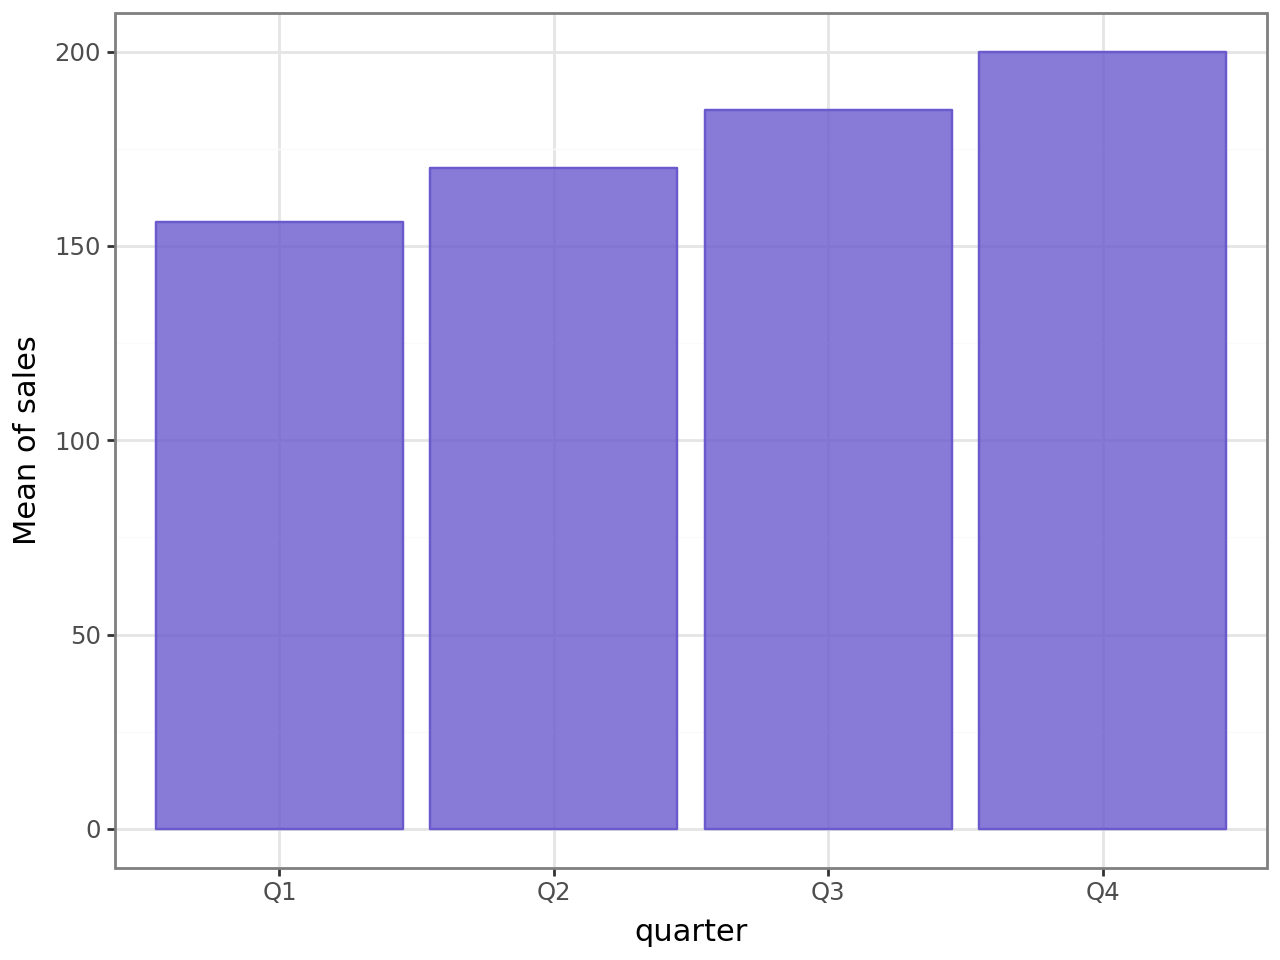

In [10]:
data = rsm.eda.unpivot(sales_wide, on=['Q1', 'Q2', 'Q3', 'Q4'], id_vars='region', variable_name='quarter', value_name='sales')

rsm.eda.visualize(data, x='quarter', y='sales', geom='bar', nobs=1000, agg='mean')